### Project - Auto Theft 

In [180]:
import pandas as pd
import numpy as np

#load data 

# clean auto_theft data 
auto_theft = pd.read_csv('Auto_Theft_Open_Data.csv')

auto_theft = auto_theft.rename(columns = {'X':'Longitude', 'Y':'Latitude', 'NEIGHBOURHOOD_158':'Neighbourhood'})
auto_theft.columns = map(str.lower, auto_theft.columns)

#remove redundant features 

auto_theft = auto_theft.drop(columns = ['long_wgs84', 'lat_wgs84', 'objectid','event_unique_id', 'report_date', 
                                        'occ_date', 'ucr_code', 'ucr_ext', 'offence', 'mci_category', 'neighbourhood_140', 
                                        'city', 'hood_140', 'location_type'])

#create dictionaries for month and date of week to replace occ_month and occ_dow with numerical values 

months = {'January':1, 'February':2, 'March':3, 'April':4, 'May': 5, 'June':6, 'July':7, 'August': 8, 'September':9, 'October':10,
          'November':11, 'December':12}

dow = {'Monday':1, 'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

#trim month and dow columns 

auto_theft.occ_month = auto_theft.occ_month.str.strip()
auto_theft.occ_dow = auto_theft.occ_dow.str.strip()
auto_theft.report_month = auto_theft.report_month.str.strip()
auto_theft.report_dow = auto_theft.report_dow.str.strip()

#replace values with dictionary values 

auto_theft.occ_month[auto_theft.occ_month.notna() == True] = [months[item] for item in auto_theft.occ_month[auto_theft.occ_month.notna() == True]]
auto_theft.occ_dow[auto_theft.occ_dow.notna() == True] = [dow[item] for item in auto_theft.occ_dow[auto_theft.occ_dow.notna() == True]]
auto_theft.report_month[auto_theft.report_month.notna() == True] = [months[item] for item in auto_theft.report_month[auto_theft.report_month.notna() == True]]
auto_theft.report_dow[auto_theft.report_dow.notna() == True] = [dow[item] for item in auto_theft.report_dow[auto_theft.report_dow.notna() == True]]

#replace na values with median

auto_theft[['occ_year', 'occ_month', 'occ_day', 'occ_doy', 'occ_dow']] = auto_theft[
    ['occ_year', 'occ_month', 'occ_day', 'occ_doy', 'occ_dow']].fillna(auto_theft[['occ_year', 'occ_month', 'occ_day', 'occ_doy', 'occ_dow']].median())

# one hot encoding for categorical variables 


one_hot = pd.get_dummies(auto_theft[['division','premises_type']])

# Drop column 'division' and 'premises_type' as it is now encoded
auto_theft = auto_theft.drop(columns = ['division','premises_type'])

# Join the encoded df
auto_theft = auto_theft.join(one_hot)

print(auto_theft.head())
#clean demographics data 

demo = pd.read_excel('wellbeing-toronto-demographics.xlsx', header = 1, index_col = 'Neighbourhood')
demo.columns = map(str.lower, demo.columns)

demo = demo.drop(columns = ['neighbourhood id'])

#replace na values with median

demo = demo.fillna(demo.median())

# print(demo.head())

# clean economics data

econ = pd.read_excel('wellbeing-toronto-economics.xlsx', header = 1, index_col = 'Neighbourhood')
econ.columns = map(str.lower, econ.columns)

econ = econ.drop(columns = ['neighbourhood id'])

#replace na values with median

econ = econ.fillna(econ.median())

# print(econ.head())

#clean housing data

housing = pd.read_excel('wellbeing-toronto-housing.xlsx', index_col = 'Neighbourhood')

housing = housing.drop(columns = ['Neighbourhood Id'])

#replace na values with median

housing = housing.fillna(housing.median())

# print(housing.head())

/var/folders/_n/s3fy955x6dj25jlrhdqtfw300000gn/T/ipykernel_10077/2359601410.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_theft.occ_month[auto_theft.occ_month.notna() == True] = [months[item] for item in auto_theft.occ_month[auto_theft.occ_month.notna() == True]]
/var/folders/_n/s3fy955x6dj25jlrhdqtfw300000gn/T/ipykernel_10077/2359601410.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_theft.occ_dow[auto_theft.occ_dow.notna() == True] = [dow[item] for item in auto_theft.occ_dow[auto_theft.occ_dow.notna() == True]]
/var/folders/_n/s3fy955x6dj25jlrhdqtfw300000gn/T/ipykernel_10077/2359601410.py:36: Se

   longitude   latitude  report_year report_month  report_day  report_doy  \
0 -79.306757  43.734652         2014            1           1           1   
1 -79.236189  43.721847         2014            1           1           1   
2 -79.529478  43.618472         2014            1           1           1   
3 -79.516814  43.683438         2014            1           2           2   
4 -79.595364  43.744281         2014            1           2           2   

  report_dow  report_hour  occ_year  occ_month  ...  division_D54  \
0          3           16    2013.0       12.0  ...             0   
1          3           15    2014.0        1.0  ...             0   
2          3           15    2013.0       12.0  ...             0   
3          4            7    2014.0        1.0  ...             0   
4          4            8    2014.0        1.0  ...             0   

   division_D55  division_NSA  premises_type_Apartment  \
0             0             0                        1   
1     

In [215]:
# join tables econ, demo, housing for cluster analysis 

neighbourhood_join = demo.join(econ, on = "Neighbourhood", how = 'left', lsuffix = 'demo', rsuffix = 'econ')

neighbourhood_join = neighbourhood_join.join(housing, on = "Neighbourhood", how = 'left', lsuffix = 'neighbourhood_join', rsuffix = 'housing')

data_for_cluster = neighbourhood_join.reset_index()

data_for_cluster = data_for_cluster.drop(columns = ['Neighbourhood'])

data_for_cluster.head()


,total area,total population,pop - males,pop - females,pop 0 - 4 years,pop 5 - 9 years,pop 10 - 14 years,pop 15 -19 years,pop 20 - 24 years,pop 25 - 29 years,...,social assistance recipients,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,30.09,34100,17095,17000,1865,1950,2155,2550,2855,2755,...,2912,317508,690,1810,6.8,5.3,38,0.312500,952,557
1,4.60,32790,16015,16765,2575,2535,2555,2620,2400,2335,...,6561,251119,4110,13395,42.9,40.9,41,7.000000,1146,1049
2,3.40,10140,4920,5225,575,580,670,675,675,675,...,1276,414216,430,1260,13.4,12.4,7,1.333333,447,270
3,2.50,10485,5035,5455,495,520,570,665,650,645,...,1323,392271,600,1050,15.2,10.0,19,4.200000,432,186
4,2.90,9550,4615,4935,670,720,720,725,655,570,...,1683,233832,870,2305,27.3,24.1,14,1.000000,463,239


In [197]:
# cluster analysis 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
random.seed(42)

# normalize data 
for column in data_for_cluster.columns:
    data_for_cluster[column] = (data_for_cluster[column] - data_for_cluster[column].min()) / (data_for_cluster[column].max() - data_for_cluster[column].min())  

    

In [218]:
# apply kmeans algorithm to data with k=5

X = data_for_cluster

kmeans = KMeans(n_clusters=6, random_state=0).fit(X) #fit model
cluster_label = kmeans.labels_

label = kmeans.fit_predict(X)

/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [203]:
def getInertia(X,kmeans):
    ''' This function returns the exact same value as the attribute inertia_ of kmeans'''
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X.iloc[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [204]:
def getInertia2(X,kmeans):
    ''' This function is analogous to getInertia, but with respect to the 2nd closest center, rather than closest one'''
    inertia2 = 0
    for J in range(len(X)):
        L = min(1,len(kmeans.cluster_centers_)-1) # this is just for the case where there is only 1 cluster at all
        dist_to_center = sorted([np.linalg.norm(X.iloc[J] - z)**2 for z in kmeans.cluster_centers_])[L]
        inertia2 = inertia2 + dist_to_center
    return inertia2  

In [207]:
inertias_1 = []
inertias_2 = []
silhouette_avgs = []
max_K = 20
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    inertias_2 = inertias_2 + [getInertia2(X,kmeans)]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mandyyip/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/m

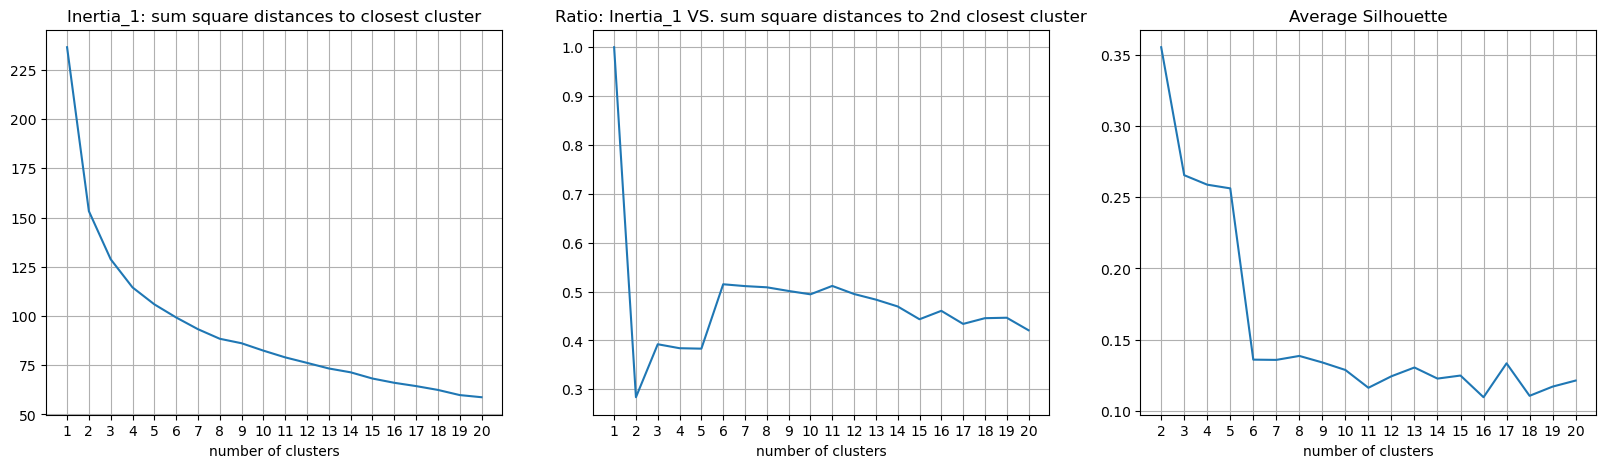

In [208]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,3,2)    
plt.title("Ratio: Inertia_1 VS. sum square distances to 2nd closest cluster")
plt.plot(np.arange(1,max_K+1),np.array(inertias_1)/np.array(inertias_2))
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

In [250]:
# join tables by neibourhood column for machine learning 

demo['Cluster_Label'] = label

auto_theft_join = auto_theft.join(demo, on = "neighbourhood")

auto_theft_join = auto_theft_join.join(econ, on = "neighbourhood", how = 'left', lsuffix = 'auto_theft_join', rsuffix = 'econ')

auto_theft_join = auto_theft_join.join(housing, on = "neighbourhood", how = 'left', lsuffix = 'auto_theft_join', rsuffix = 'housing')

occ_count = auto_theft_join.groupby(['neighbourhood', 'occ_month','occ_year'])['neighbourhood'].count().reset_index(name = 'count')

occ_count = occ_count.rename(columns = {'neighbourhood':'Neighbourhood'})

occ_count_final = occ_count.set_index('Neighbourhood').join(neighbourhood_join, on = 'Neighbourhood', how = 'left', lsuffix = 'occ_count', rsuffix = 'neighbourhood_join')

# neighbourhood_join = neighbourhood_join.reset_index()

# neighbourhood_join = neighbourhood_join.drop(columns = ['Neighbourhood'])

occ_count_final = occ_count_final.reset_index()

occ_count_final = occ_count_final.drop(columns = ['Neighbourhood'])

#drop na since demo, econ, and housing data does not include some of the new 150 neighbourhoods 

occ_count_final = occ_count_final.dropna()




In [256]:
# ridge regression 

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

X = occ_count_final.loc[:, occ_count_final.columns != 'count']

y = occ_count_final['count']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
alpha = 1.0  # Regularization parameter
ridge_reg = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the learned coefficients
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
print("Learned Coefficients:", coefficients)
print("Learned Intercept:", intercept)




Mean Squared Error: 6.783019387139125
Learned Coefficients: [ 7.13461317e-02  4.06494610e-01  6.96158124e-01  1.80085156e-02
 -1.68222173e-02 -1.76249294e-02 -1.83354904e-03  1.07445175e-02
 -4.55080251e-03 -1.56311473e-02 -2.01887705e-02  4.15500276e-03
  6.77002535e-04  3.51676758e-03 -8.83210170e-04 -2.26071888e-03
  1.47598175e-03 -6.03852830e-03 -1.18172629e-02  6.18996983e-03
  7.30131300e-03  1.06280207e-02  2.63681316e-03  9.58268178e-04
  1.05505441e-02 -1.47289936e-02  2.01779942e-03  1.87917156e-02
 -2.40776099e-03  1.56758647e-04  5.15459529e-04  2.10905646e-03
 -1.33318434e-03  8.76849924e-05  8.49764913e-04  3.38863691e-04
  5.63431614e-04 -5.03433822e-04 -4.65261995e-04 -7.05738976e-04
  3.95731327e-03 -7.25530121e-03 -3.56108097e-07  1.08796641e-04
 -1.32272634e-03 -2.94315280e-07  2.27977101e-04 -4.59156479e-04
  1.14351505e-01 -7.83081620e-02  8.03771176e-02  1.64563514e-02
  2.47542806e-04  1.33441518e-03  3.24734031e-02]
Learned Intercept: -815.9124023038036
